In [4]:
# End-to-End Machine Learning Pipeline Assignment using MySQL and Streamlit for IRIS Dataset
# Step 1: Setup and Data Preparation
# Install and Import Necessary Libraries
!pip install pandas sqlalchemy streamlit scikit-learn xgboost matplotlib seaborn mysql-connector-python

In [5]:
# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pickle

In [6]:
# Step 3: Load Data from MySQL to Jupyter Notebook
# Establishing a connection for MySQL and Data Download from MySQL to Jupyter Notebook:

import pymysql
import warnings
warnings.filterwarnings('ignore')

try:
    # Establish the connection
    conn = pymysql.connect(
        host = '127.0.0.1',
        user = 'root',
        password = 'Vizag!23', # Give your own MySQL password here
        port = 3306
    )

    # Load data into DataFrame
    query = "SELECT * FROM iris.iris"
    df = pd.read_sql(query, conn)
    print("Data downloaded from MySQL to Jupyter successfully!")

    # Display the results
    print('Connection successful. Here is your data :')
    
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())
    print("\nDataFrame information:")
    print(df.info())

except pymysql.Error as e:
    print(f"MySQL Error : {e}")

finally:
    if 'conn' in locals():
        conn.close()
        print('Connection closed succesfully !!!')

Data downloaded from MySQL to Jupyter successfully!
Connection successful. Here is your data :

First 5 rows of the DataFrame:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm  

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
count     150.000000    150.000000     150.000000    150.000000  150.000000
mean        5.843333      3.054000       3.758667      1.198667    1.000000
std         0.828066      0.433594       1.764420      0.763161    0.819232
min         4.300000      2.000000       1.000000      0.100000    0.000000
25%         5.100000      2.800000       1.600000      0.300000    0.000000
50%         5.800000      3.000000       4.350000      1.300000    1.000000
75%         6.400000      3.300000       5.100000      1.800000    2.000000
max         7.900000      4.400000       6.900000      2.500000    2.000000


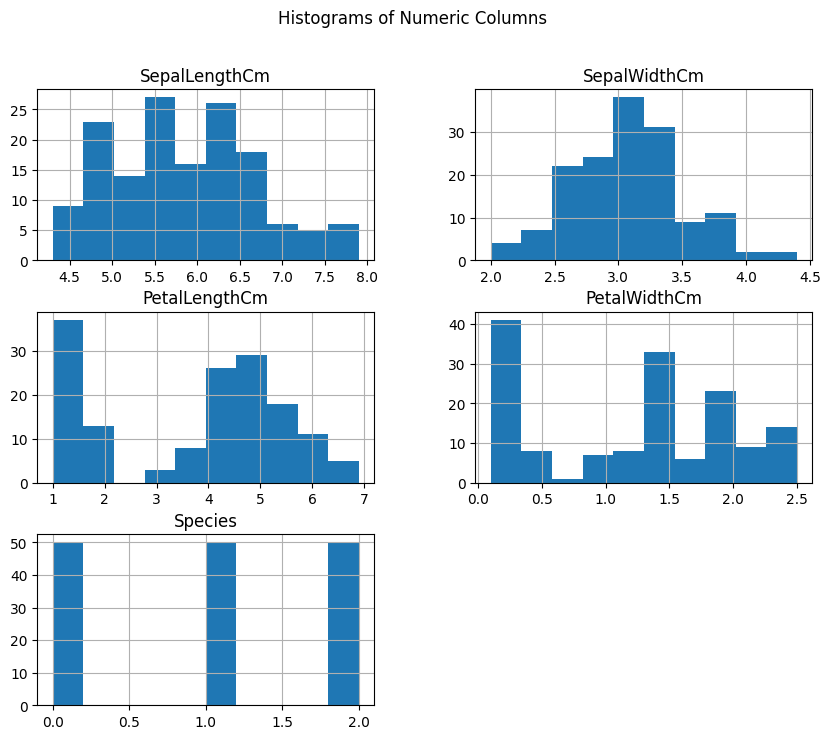

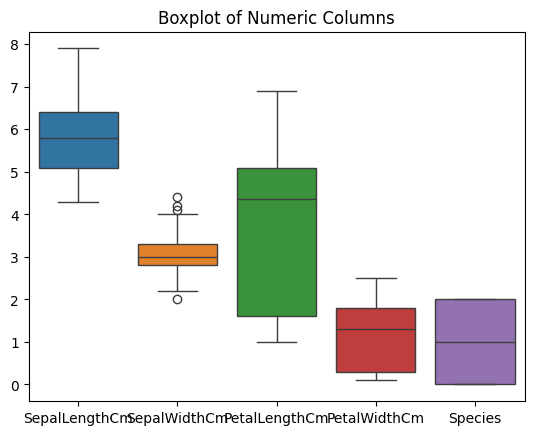

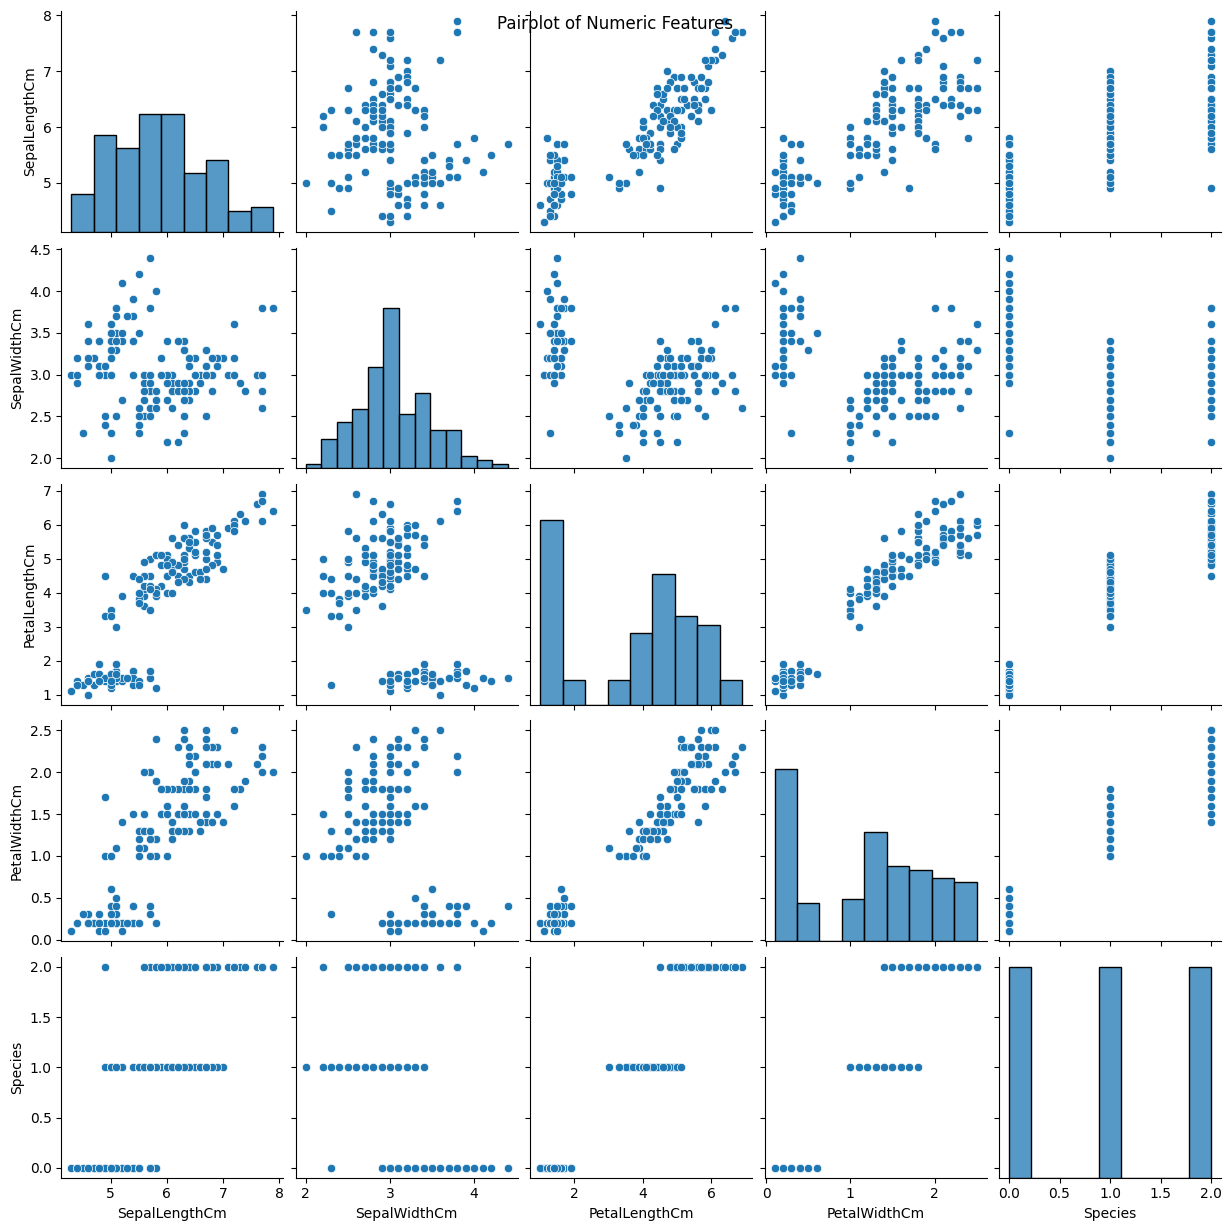

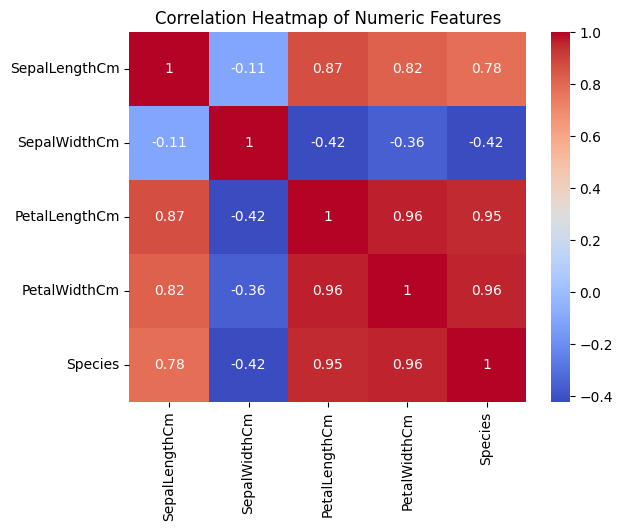

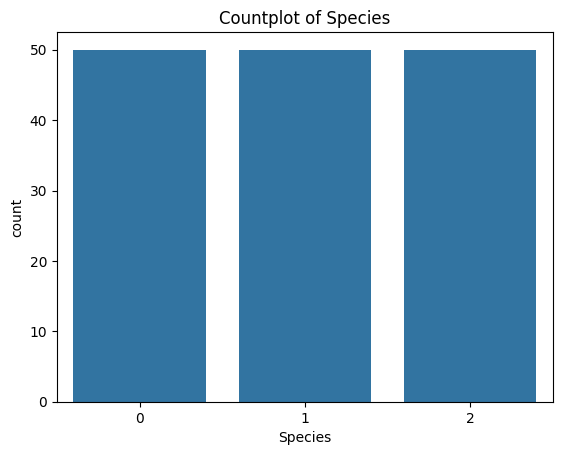

In [12]:
# Step 4: Exploratory Data Analysis (EDA)
# Visualizations: Histograms, Boxplots, Pairplots, Correlation Heatmaps

# Remove extra spaces from column names
df.columns = df.columns.str.strip()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming df is your DataFrame
# Example: df = pd.read_csv('your_data.csv')

# Checking for missing values and summary statistics
print(df.isnull().sum())
print(df.describe())

# Encoding the 'Species' column (categorical) if it exists
if 'Species' in df.columns:
    label_encoder = LabelEncoder()
    df['Species'] = label_encoder.fit_transform(df['Species'])

# Check if the 'Id' column exists before dropping it
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Histograms
df.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numeric Columns")  # Title for the plot
plt.show()

# Boxplots
sns.boxplot(data=df)
plt.title("Boxplot of Numeric Columns")  # Title for the plot
plt.show()

# Pairplots
sns.pairplot(df)
plt.suptitle("Pairplot of Numeric Features")  # Title for the plot
plt.show()

# Correlation Heatmap
# Select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')  # annot=True adds the correlation coefficient in each cell
plt.title("Correlation Heatmap of Numeric Features")  # Title for the plot
plt.show()

# Bar plot for categorical variables (for example, Species)
sns.countplot(data=df, x='Species')
plt.title("Countplot of Species")  # Title for the plot
plt.show()


In [13]:
# Step 5: Model Building with Random Forest and XGBoost
# Next, we will split the data and train two models: Random Forest and XGBoost.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Prepare the features and target
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Features
y = df['Species']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train XGBoost Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate models
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_pred)}")


Random Forest Accuracy: 1.0
XGBoost Accuracy: 1.0


In [14]:
# Step 6: Model Saving
# Once the models are trained, save them using pickle.

import pickle

# Save the Random Forest model
with open('random_forest_model_iris.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save the XGBoost model
with open('xgboost_model_iris.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)


In [15]:
# Step 7: Streamlit App Development (irisapp.py)
# Now, let's create the Streamlit app to interact with the trained models.

import pickle
import numpy as np
import streamlit as st
from sklearn.preprocessing import StandardScaler

# Load the models
@st.cache_resource
def load_rf_model():
    with open('random_forest_model_iris.pkl', 'rb') as f:
        return pickle.load(f)

@st.cache_resource
def load_xgb_model():
    with open('xgboost_model_iris.pkl', 'rb') as f:
        return pickle.load(f)

# Streamlit app
st.title("Iris Flower Prediction App")

# Input fields for user to provide feature values
sepal_length = st.number_input('Sepal Length (cm)', step=0.1)
sepal_width = st.number_input('Sepal Width (cm)', step=0.1)
petal_length = st.number_input('Petal Length (cm)', step=0.1)
petal_width = st.number_input('Petal Width (cm)', step=0.1)

# When Predict with Random Forest is clicked
if st.button('Predict with Random Forest'):
    if sepal_length == 0.0 or sepal_width == 0.0 or petal_length == 0.0 or petal_width == 0.0:
        st.error("Please provide non-zero values for all inputs!")
    else:
        # Prepare input data for prediction
        input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
        
        # Scale the data
        scaler = StandardScaler()
        input_data_scaled = scaler.fit_transform(input_data)
        
        # Load the model and make predictions
        rf_model = load_rf_model()
        prediction = rf_model.predict(input_data_scaled)
        
        # Display results
        st.write(f"The predicted Iris flower species is: {prediction[0]}")
        
        # Add species descriptions
        species_descriptions = {
            'Setosa': 'Iris Setosa is characterized by its small flowers with wide petals. It is one of the earliest blooming Iris species.',
            'Versicolor': 'Iris Versicolor is a medium-sized species with slightly larger flowers. Its petals are more narrow than Setosa.',
            'Virginica': 'Iris Virginica is a large species with elegant flowers that have broad petals, often found in wetlands.'
        }
        
        st.write(f"Description: {species_descriptions[prediction[0]]}")

# When Predict with XGBoost is clicked
if st.button('Predict with XGBoost'):
    if sepal_length == 0.0 or sepal_width == 0.0 or petal_length == 0.0 or petal_width == 0.0:
        st.error("Please provide non-zero values for all inputs!")
    else:
        # Prepare input data for prediction
        input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
        
        # Scale the data
        scaler = StandardScaler()
        input_data_scaled = scaler.fit_transform(input_data)
        
        # Load the model and make predictions
        xgb_model = load_xgb_model()
        prediction = xgb_model.predict(input_data_scaled)
        
        # Display results
        st.write(f"The predicted Iris flower species is: {prediction[0]}")
        
        # Add species descriptions
        species_descriptions = {
            'Setosa': 'Iris Setosa is characterized by its small flowers with wide petals. It is one of the earliest blooming Iris species.',
            'Versicolor': 'Iris Versicolor is a medium-sized species with slightly larger flowers. Its petals are more narrow than Setosa.',
            'Virginica': 'Iris Virginica is a large species with elegant flowers that have broad petals, often found in wetlands.'
        }
        
        st.write(f"Description: {species_descriptions[prediction[0]]}")


2025-04-30 23:34:38.483 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-30 23:34:38.870 
  command:

    streamlit run C:\Users\gnikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-30 23:34:38.886 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-30 23:34:38.888 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-30 23:34:38.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-30 23:34:38.894 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-30 23:34:38.896 Thread 'MainThread': missing ScriptRunContext! This w